In [6]:
import pandas as pd

In [38]:
df_corrosion_n1 = pd.read_csv('dataset/copy_of_original_data/copy_corrosion_N1.csv')
df_corrosion_n2 = pd.read_csv('dataset/copy_of_original_data/copy_corrosion_N2.csv')
df_corrosion_n3 = pd.read_csv('dataset/copy_of_original_data/copy_corrosion_N3.csv')

/var/folders/0l/p2_v2ssd19s30xk4x88_7cy00000gn/T/ipykernel_1208/654642129.py:1: DtypeWarning: Columns (0,1,3,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_corrosion_n1 = pd.read_csv('dataset/copy_of_original_data/copy_corrosion_N1.csv')
/var/folders/0l/p2_v2ssd19s30xk4x88_7cy00000gn/T/ipykernel_1208/654642129.py:2: DtypeWarning: Columns (0,1,3,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_corrosion_n2 = pd.read_csv('dataset/copy_of_original_data/copy_corrosion_N2.csv')
/var/folders/0l/p2_v2ssd19s30xk4x88_7cy00000gn/T/ipykernel_1208/654642129.py:3: DtypeWarning: Columns (0,1,3,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_corrosion_n3 = pd.read_csv('dataset/copy_of_original_data/copy_corrosion_N3.csv')


In [39]:
df_corrosion_n1.drop(columns=['Unnamed: 2', 'Unnamed: 5'], axis=1, inplace=True)
df_corrosion_n1 = df_corrosion_n1.rename(columns={
    'Input A (Acoustic Emission Data)' : 'time1',
    'Input B (Electrochemical Data)' : 'time2',
    'Input C (Mechanical Data)' : 'time3',
    'Unnamed: 1' : 'accoustic_emmision_data',
    'Unnamed: 4' : 'electrochemical_data',
    'Unnamed: 7' : 'mechanical_data'
})
df_corrosion_n1.columns

Index(['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data'],
      dtype='object')

In [40]:
df_corrosion_n1['output'] = 'None'

In [41]:
df_corrosion_n2.drop(columns=['Unnamed: 2', 'Unnamed: 5', 'Unnamed: 8'], axis=1, inplace=True)
df_corrosion_n2 = df_corrosion_n2.rename(columns={
    'Input A (Acoustic Emission Data)' : 'time1',
    'Input B (Electrochemical Data)' : 'time2',
    'Input C (Mechanical Data)' : 'time3',
    'Unnamed: 1' : 'accoustic_emmision_data',
    'Unnamed: 4' : 'electrochemical_data',
    'Unnamed: 7' : 'mechanical_data',
    'Output D (Corrosion Condition) ?':'output'
})
df_corrosion_n2.columns

Index(['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data', 'output'],
      dtype='object')

In [42]:
df_corrosion_n3.drop(columns=['Unnamed: 2', 'Unnamed: 5', 'Unnamed: 8'], axis=1, inplace=True)
df_corrosion_n3 = df_corrosion_n2.rename(columns={
    'Input A (Acoustic Emission Data)' : 'time1',
    'Input B (Electrochemical Data)' : 'time2',
    'Input C (Mechanical Data)' : 'time3',
    'Unnamed: 1' : 'accoustic_emmision_data',
    'Unnamed: 4' : 'electrochemical_data',
    'Unnamed: 7' : 'mechanical_data',
    'Output D (Corrosion Condition) ?':'output'
})
df_corrosion_n3.columns

Index(['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data', 'output'],
      dtype='object')

### Corrosion set N1 data cleaning

In [43]:
df_temp = df_corrosion_n1[~df_corrosion_n1['accoustic_emmision_data'].isnull()]
df_temp = df_temp[df_temp['electrochemical_data'].notnull()]
df_temp = df_temp[df_temp['mechanical_data'].notnull()]
df_temp = df_temp.iloc[2:].reset_index(drop=True)
df_temp.isnull().sum(), df_temp.shape

(time1                      0
 accoustic_emmision_data    0
 time2                      0
 electrochemical_data       0
 time3                      0
 mechanical_data            0
 output                     0
 dtype: int64,
 (243600, 7))

In [44]:
cols = ['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data']
for col in cols:
    df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')
df_temp.shape

(243600, 7)

In [45]:
df_temp = df_temp[df_temp['accoustic_emmision_data'].notnull()]
df_temp.isnull().sum()

time1                      0
accoustic_emmision_data    0
time2                      0
electrochemical_data       0
time3                      0
mechanical_data            0
output                     0
dtype: int64

In [46]:
time_cols = ['time1','time2','time3']
for col in time_cols:
    df_temp[col] = round(df_temp[col], 2)

In [47]:
df_time1 = df_temp[['time1', 'accoustic_emmision_data']]
df_time2 = df_temp[['time2', 'electrochemical_data']]
df_time3 = df_temp[['time3', 'mechanical_data']]

In [48]:
df_time3.sort_values(by='time3')

,time3,mechanical_data
0,0.05,0.004036
1,0.06,0.004036
2,0.08,0.004036
3,0.09,0.004036
4,0.11,0.002699
...,...,...
243595,3630.55,0.030747
243596,3630.56,0.030747
243597,3630.58,0.030747
243598,3630.59,0.033663


In [49]:
df_time_temp = df_time1.merge(df_time2, left_on='time1', right_on='time2')
df_time_temp.shape

(204222, 4)

In [50]:
df_time_temp = df_time_temp[['time1', 'accoustic_emmision_data', 'electrochemical_data']]
df_time_temp_1 = df_time_temp.merge(df_time3, left_on='time1', right_on='time3')
df_time_temp_1.shape, df_time_temp_1.isnull().sum()

((137620, 5),
 time1                      0
 accoustic_emmision_data    0
 electrochemical_data       0
 time3                      0
 mechanical_data            0
 dtype: int64)

In [51]:
cleaned_n1 = df_time_temp_1.copy()
cleaned_n1 = cleaned_n1[['time1', 'accoustic_emmision_data', 'electrochemical_data', 'mechanical_data']]
cleaned_n1.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data
0,0.05,1.140000e+09,0.000003,0.004036
1,0.06,1.150000e+09,0.000003,0.004036
2,0.08,1.150000e+09,0.000003,0.004036
3,0.09,1.140000e+09,0.000003,0.004036
4,0.11,1.140000e+09,0.000003,0.002699


In [93]:
cleaned_n1['output'] = 'corrosion'
cleaned_n1.to_csv('dataset/n1_n2_n3_cleaned/corrosion_N1.csv', index=False)
cleaned_n1.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data,output
0,0.05,1.140000e+09,0.000003,0.004036,corrosion
1,0.06,1.150000e+09,0.000003,0.004036,corrosion
2,0.08,1.150000e+09,0.000003,0.004036,corrosion
3,0.09,1.140000e+09,0.000003,0.004036,corrosion
4,0.11,1.140000e+09,0.000003,0.002699,corrosion


### Corrosion set N2 data cleaning

In [53]:
df_corrosion_n2.output = 'corrosion'

In [54]:
df_temp = df_corrosion_n2[~df_corrosion_n2['accoustic_emmision_data'].isnull()]
df_temp = df_temp[df_temp['electrochemical_data'].notnull()]
df_temp = df_temp[df_temp['mechanical_data'].notnull()]
df_temp = df_temp.iloc[2:].reset_index(drop=True)
df_temp.isnull().sum(), df_temp.shape

(time1                      0
 accoustic_emmision_data    0
 time2                      0
 electrochemical_data       0
 time3                      0
 mechanical_data            0
 output                     0
 dtype: int64,
 (290353, 7))

In [55]:
cols = ['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data']
for col in cols:
    df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')
df_temp.shape

(290353, 7)

In [56]:
df_temp = df_temp[df_temp['accoustic_emmision_data'].notnull()]
df_temp.isnull().sum()

time1                      0
accoustic_emmision_data    0
time2                      0
electrochemical_data       0
time3                      0
mechanical_data            0
output                     0
dtype: int64

In [57]:
time_cols = ['time1','time2','time3']
for col in time_cols:
    df_temp[col] = round(df_temp[col], 2)

In [58]:
df_time1 = df_temp[['time1', 'accoustic_emmision_data']]
df_time2 = df_temp[['time2', 'electrochemical_data']]
df_time3 = df_temp[['time3', 'mechanical_data']]

In [59]:
df_time3.sort_values(by='time3')

,time3,mechanical_data
0,0.01,0.007012
1,0.03,0.007012
2,0.04,0.007012
3,0.06,0.007012
4,0.07,0.007012
...,...,...
290348,4319.12,0.044614
290349,4319.14,0.044614
290350,4319.15,0.044687
290351,4319.17,0.044687


In [60]:
df_time_temp = df_time1.merge(df_time2, left_on='time1', right_on='time2')
df_time_temp.shape

(290350, 4)

In [61]:
df_time_temp = df_time_temp[['time1', 'accoustic_emmision_data', 'electrochemical_data']]
df_time_temp_1 = df_time_temp.merge(df_time3, left_on='time1', right_on='time3')
df_time_temp_1.shape, df_time_temp_1.isnull().sum()

((195185, 5),
 time1                      0
 accoustic_emmision_data    0
 electrochemical_data       0
 time3                      0
 mechanical_data            0
 dtype: int64)

In [62]:
cleaned_n2 = df_time_temp_1.copy()
cleaned_n2 = cleaned_n2[['time1', 'accoustic_emmision_data', 'electrochemical_data', 'mechanical_data']]
cleaned_n2.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data
0,0.01,1640000.0,-4.850000e-07,0.007012
1,0.03,312000.0,-3.140000e-07,0.007012
2,0.04,313000.0,-5.280000e-07,0.007012
3,0.06,320000.0,-4.820000e-07,0.007012
4,0.07,326000.0,-3.870000e-07,0.007012


In [94]:
cleaned_n2['output'] = 'corrosion'
cleaned_n2.to_csv('dataset/n1_n2_n3_cleaned/corrosion_N2.csv', index=False)
cleaned_n2.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data,output
0,0.01,1640000.0,-4.850000e-07,0.007012,corrosion
1,0.03,312000.0,-3.140000e-07,0.007012,corrosion
2,0.04,313000.0,-5.280000e-07,0.007012,corrosion
3,0.06,320000.0,-4.820000e-07,0.007012,corrosion
4,0.07,326000.0,-3.870000e-07,0.007012,corrosion


### Corrosion set N3 data cleaning

In [66]:
df_corrosion_n3.output = 'corrosion'

In [67]:
df_temp = df_corrosion_n3[~df_corrosion_n3['accoustic_emmision_data'].isnull()]
df_temp = df_temp[df_temp['electrochemical_data'].notnull()]
df_temp = df_temp[df_temp['mechanical_data'].notnull()]
df_temp = df_temp.iloc[2:].reset_index(drop=True)
df_temp.isnull().sum(), df_temp.shape

(time1                      0
 accoustic_emmision_data    0
 time2                      0
 electrochemical_data       0
 time3                      0
 mechanical_data            0
 output                     0
 dtype: int64,
 (290353, 7))

In [68]:
cols = ['time1', 'accoustic_emmision_data', 'time2', 'electrochemical_data',
       'time3', 'mechanical_data']
for col in cols:
    df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')
df_temp.shape

(290353, 7)

In [69]:
df_temp = df_temp[df_temp['accoustic_emmision_data'].notnull()]
df_temp.isnull().sum()

time1                      0
accoustic_emmision_data    0
time2                      0
electrochemical_data       0
time3                      0
mechanical_data            0
output                     0
dtype: int64

In [70]:
time_cols = ['time1','time2','time3']
for col in time_cols:
    df_temp[col] = round(df_temp[col], 2)

In [72]:
df_time1 = df_temp[['time1', 'accoustic_emmision_data']]
df_time2 = df_temp[['time2', 'electrochemical_data']]
df_time3 = df_temp[['time3', 'mechanical_data']]

In [74]:
df_time3.sort_values(by='time3')

,time3,mechanical_data
0,0.01,0.007012
1,0.03,0.007012
2,0.04,0.007012
3,0.06,0.007012
4,0.07,0.007012
...,...,...
290348,4319.12,0.044614
290349,4319.14,0.044614
290350,4319.15,0.044687
290351,4319.17,0.044687


In [75]:
df_time_temp = df_time1.merge(df_time2, left_on='time1', right_on='time2')
df_time_temp.shape

(290350, 4)

In [76]:
df_time_temp = df_time_temp[['time1', 'accoustic_emmision_data', 'electrochemical_data']]
df_time_temp_1 = df_time_temp.merge(df_time3, left_on='time1', right_on='time3')
df_time_temp_1.shape, df_time_temp_1.isnull().sum()

((195185, 5),
 time1                      0
 accoustic_emmision_data    0
 electrochemical_data       0
 time3                      0
 mechanical_data            0
 dtype: int64)

In [77]:
cleaned_n3 = df_time_temp_1.copy()
cleaned_n3 = cleaned_n3[['time1', 'accoustic_emmision_data', 'electrochemical_data', 'mechanical_data']]
cleaned_n3.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data
0,0.01,1640000.0,-4.850000e-07,0.007012
1,0.03,312000.0,-3.140000e-07,0.007012
2,0.04,313000.0,-5.280000e-07,0.007012
3,0.06,320000.0,-4.820000e-07,0.007012
4,0.07,326000.0,-3.870000e-07,0.007012


In [95]:
cleaned_n3['output'] = 'corrosion'
cleaned_n3.to_csv('dataset/n1_n2_n3_cleaned/corrosion_N3.csv', index=False)
cleaned_n3.head()

,time1,accoustic_emmision_data,electrochemical_data,mechanical_data,output
0,0.01,1640000.0,-4.850000e-07,0.007012,corrosion
1,0.03,312000.0,-3.140000e-07,0.007012,corrosion
2,0.04,313000.0,-5.280000e-07,0.007012,corrosion
3,0.06,320000.0,-4.820000e-07,0.007012,corrosion
4,0.07,326000.0,-3.870000e-07,0.007012,corrosion


### Concatinating N1, N2 and, N3

In [80]:
df_corrosion_concat = pd.concat([cleaned_n1, cleaned_n2, cleaned_n3])
df_corrosion_concat.isnull().sum(), df_corrosion_concat.shape

(time1                      0
 accoustic_emmision_data    0
 electrochemical_data       0
 mechanical_data            0
 dtype: int64,
 (527990, 4))

In [91]:
df_corrosion_concat['output'] = 'corrosion'

In [92]:
df_corrosion_concat.to_csv('dataset/corrosion_concat.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

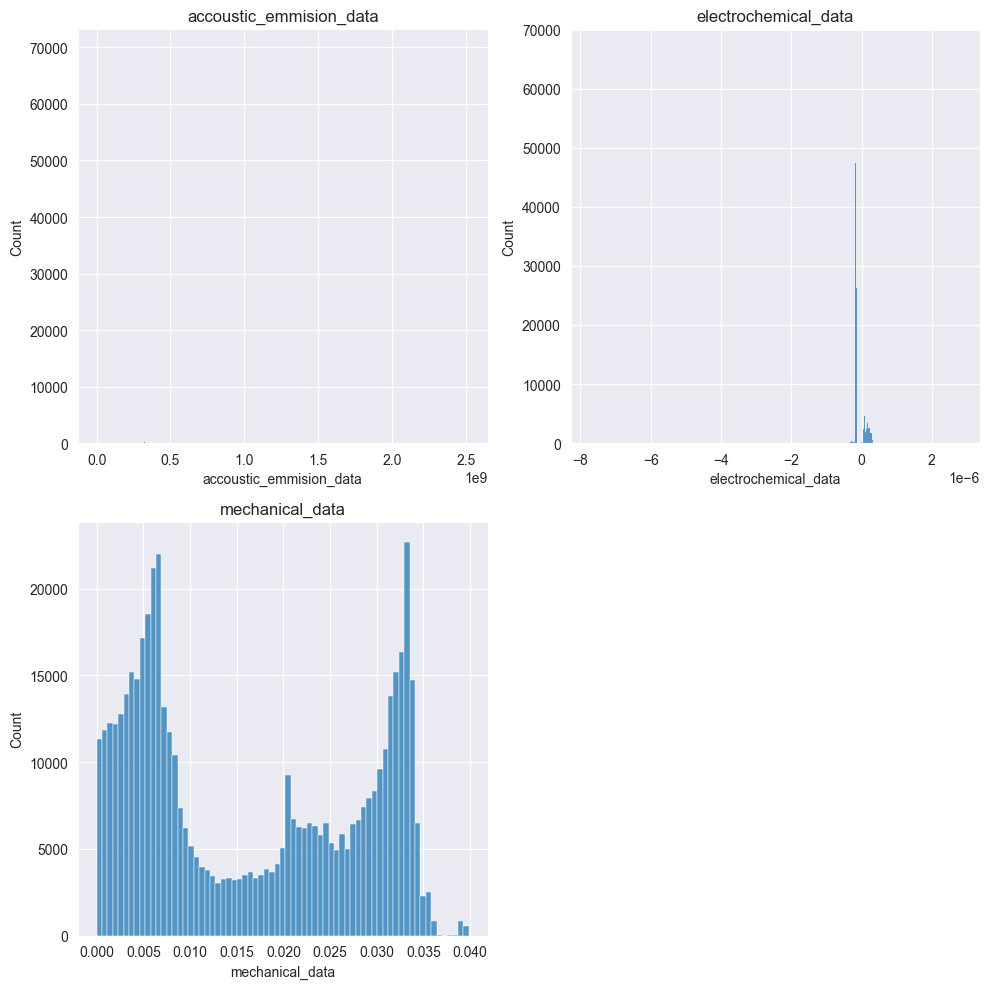

In [87]:
num_plots = 3
num_cols = 2  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(['accoustic_emmision_data', 'electrochemical_data','mechanical_data']):
    sns.histplot(df_corrosion_concat[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

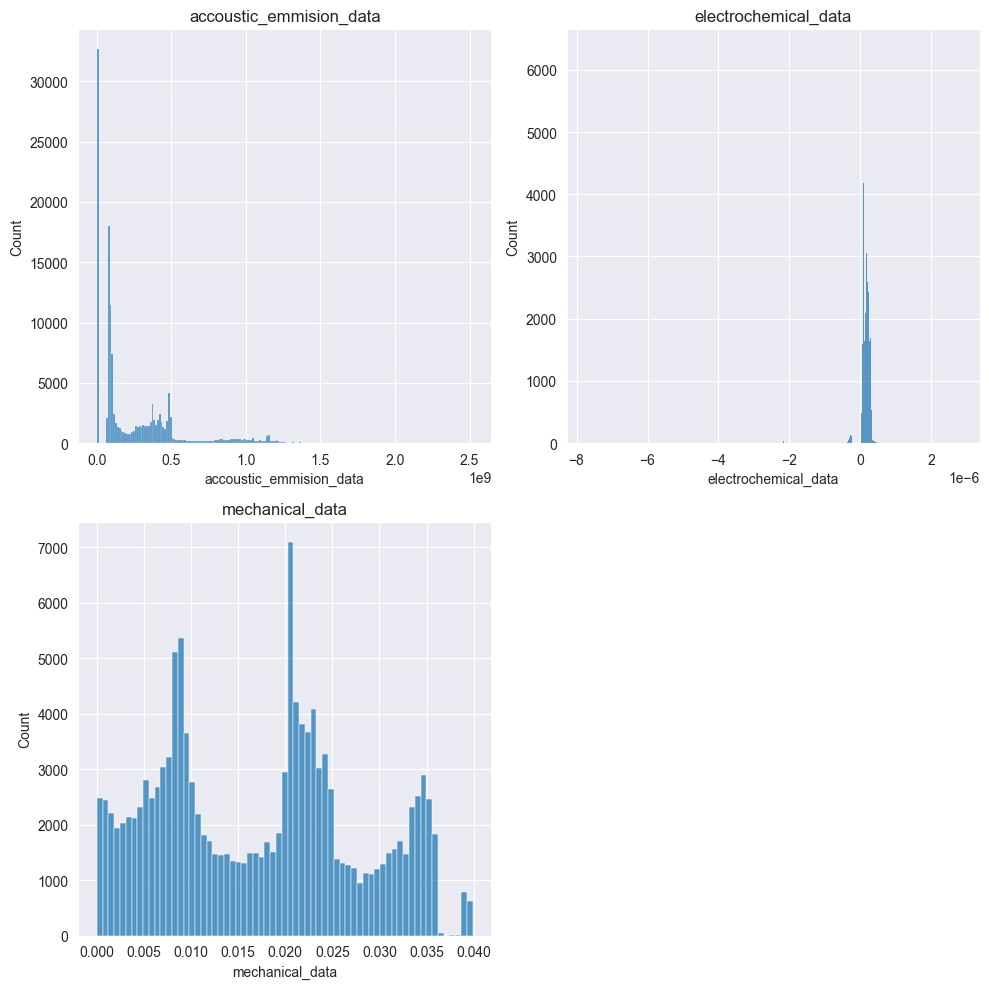

In [84]:
num_plots = 3
num_cols = 2  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(['accoustic_emmision_data', 'electrochemical_data','mechanical_data']):
    sns.histplot(cleaned_n1[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

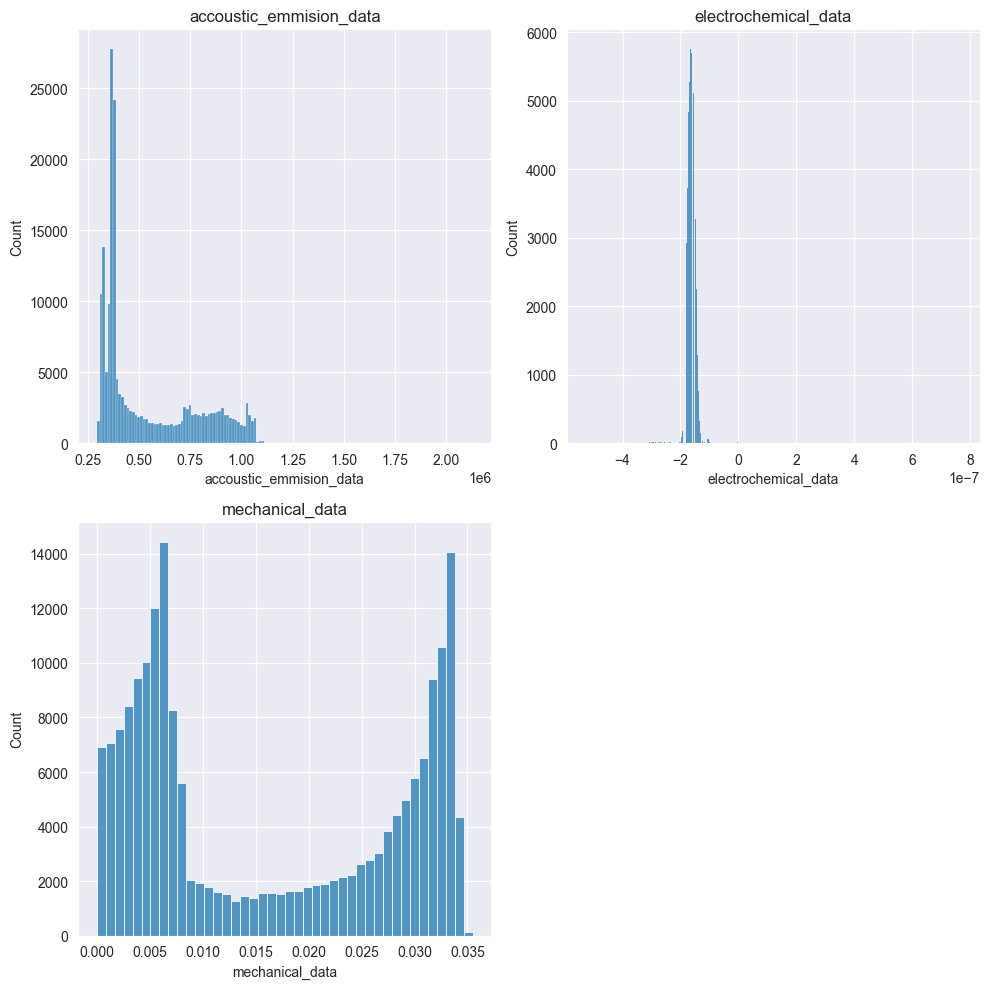

In [85]:
num_plots = 3
num_cols = 2  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(['accoustic_emmision_data', 'electrochemical_data','mechanical_data']):
    sns.histplot(cleaned_n2[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

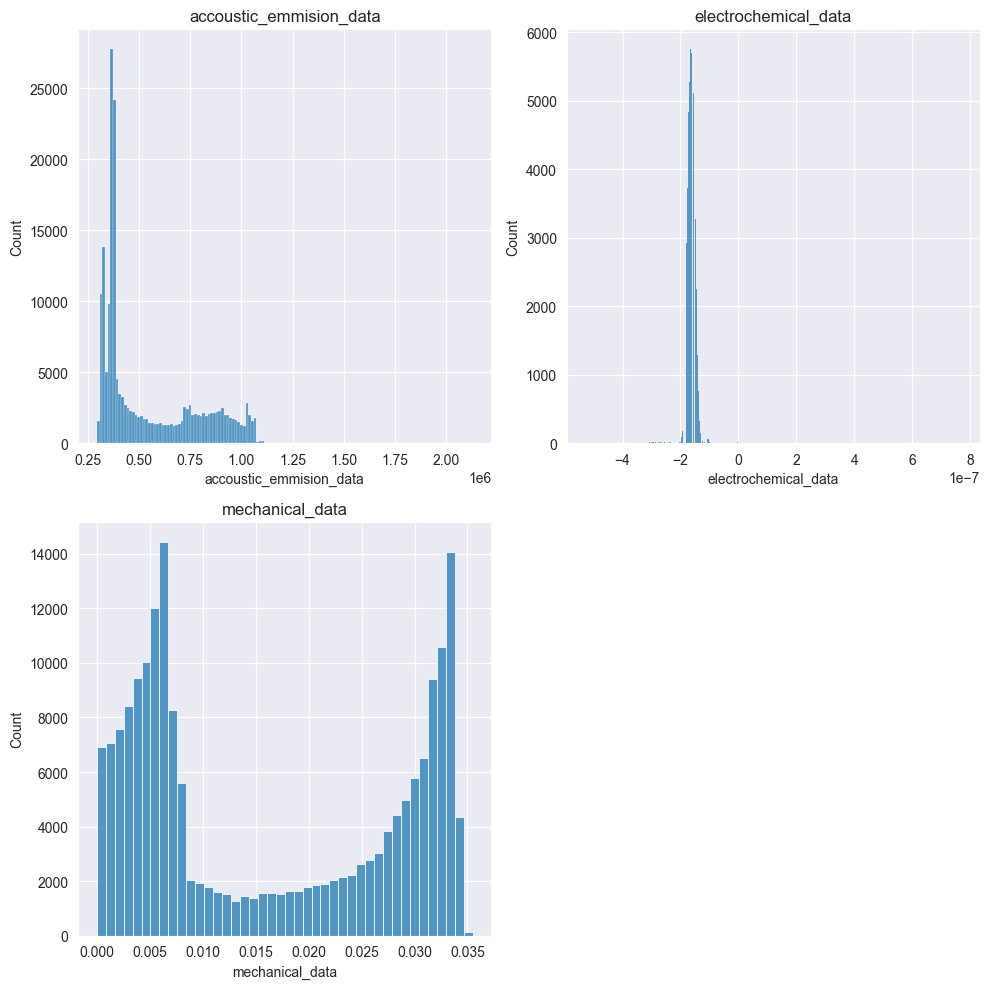

In [86]:
num_plots = 3
num_cols = 2  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(['accoustic_emmision_data', 'electrochemical_data','mechanical_data']):
    sns.histplot(cleaned_n3[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()